# Logistic Regression – Class Assessment

In [1]:
'''
Mayur V kolki(PGA14)
'''

'\nMayur V kolki(PGA14)\n'

In [2]:
#important libraries 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn.preprocessing import LabelEncoder #(specially use to for only y )
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

In [3]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Basic steps to go under the algorithm
#1)understanding the problem statement
#2) do the data minning 
#3)data preparation/ data cleaning
#4)do the sampling
#5)build the model(train the model)
#6)Test the model on the test data
#7) check the model for the business sutability


In [4]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/LogisticRegressionusingPython/Logistic Regression using Python/xAPI-Edu-Data.csv"
data=pd.read_csv(path)

In [5]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [6]:
#data summary 
data.describe(include="all")

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [7]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [8]:
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [9]:
nc

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

In [10]:
fc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [11]:
#EDA
#NULL CHECK
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [12]:
#0 check 
data[nc][data[nc]==0].count()

raisedhands           9
VisITedResources      7
AnnouncementsView    10
Discussion            0
dtype: int64

In [13]:
#data.raisedhands.mean()
#data.raisedhands = data.raisedhands.replace(0,46)

#
NO need of imputing zeroes as because they are valid in dataset

In [14]:
data.shape

(480, 17)

In [15]:
fc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [16]:
cat=data[fc]
cat

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


# Q.1 Visualize just the categorical features individually to see 
# what options are included and how each option fares 
# when it comes to count(how many times it appears) and 
# see what can be deduce from that?


M    305
F    175
Name: gender, dtype: int64

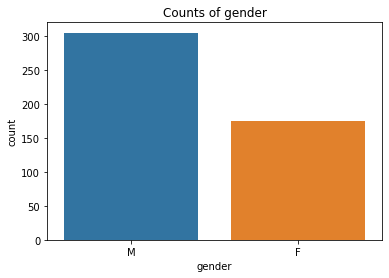

In [17]:
sns.countplot(x='gender' , data= data , order = data['gender'].value_counts().index)
plt.title('Counts of gender')
data.gender.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

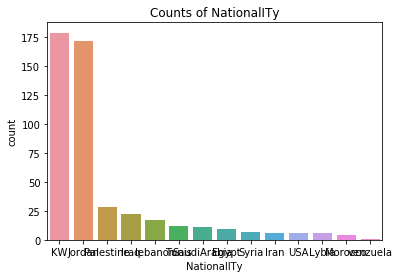

In [18]:
sns.countplot(x='NationalITy' , data= data , order = data['NationalITy'].value_counts().index)
plt.title('Counts of NationalITy')
data['NationalITy'].value_counts()

In [19]:
data.NationalITy[data.NationalITy.isin(['venzuela'])] = 'KW'

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data['NationalITy'].value_counts()

KW             180
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
Name: NationalITy, dtype: int64

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

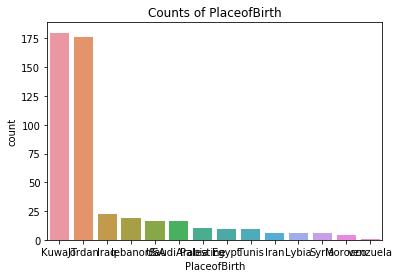

In [21]:
sns.countplot(x='PlaceofBirth' , data= data , order = data['PlaceofBirth'].value_counts().index)
plt.title('Counts of PlaceofBirth')
data.PlaceofBirth.value_counts()

In [22]:
data.PlaceofBirth[data.PlaceofBirth.isin(['venzuela'])] = 'KuwaIT'

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data.PlaceofBirth.value_counts()

KuwaIT         181
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
Name: PlaceofBirth, dtype: int64

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

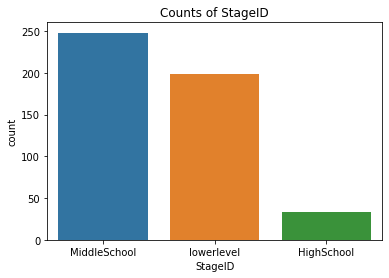

In [24]:
sns.countplot(x='StageID' , data= data , order = data['StageID'].value_counts().index)
plt.title('Counts of StageID')
data.StageID.value_counts()


G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

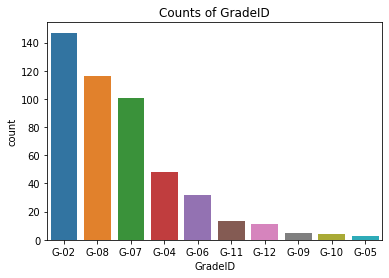

In [25]:
sns.countplot(x='GradeID' , data= data , order = data['GradeID'].value_counts().index)
plt.title('Counts of GradeID')
data.GradeID.value_counts()

A    283
B    167
C     30
Name: SectionID, dtype: int64

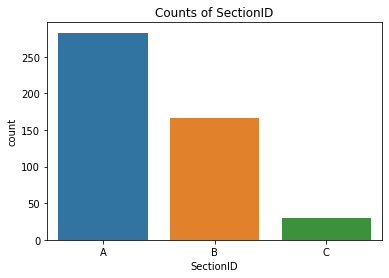

In [26]:
sns.countplot(x='SectionID' , data= data , order = data['SectionID'].value_counts().index)
plt.title('Counts of SectionID')
data.SectionID.value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

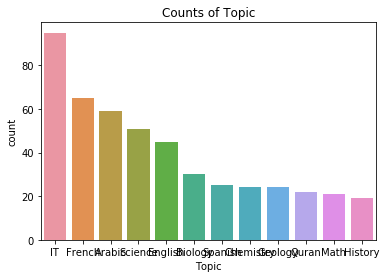

In [27]:
sns.countplot(x='Topic' , data= data , order = data['Topic'].value_counts().index)
plt.title('Counts of Topic')
data.Topic.value_counts()

F    245
S    235
Name: Semester, dtype: int64

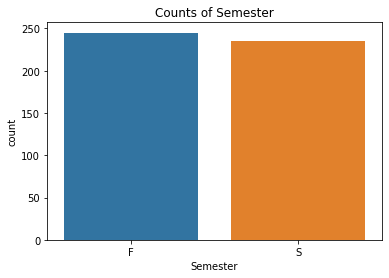

In [28]:
sns.countplot(x='Semester' , data= data , order = data['Semester'].value_counts().index)
plt.title('Counts of Semester')
data.Semester.value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

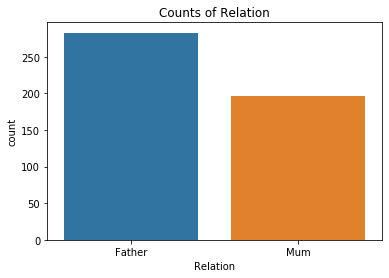

In [29]:
sns.countplot(x='Relation' , data= data , order = data['Relation'].value_counts().index)
plt.title('Counts of Relation')
data.Relation.value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

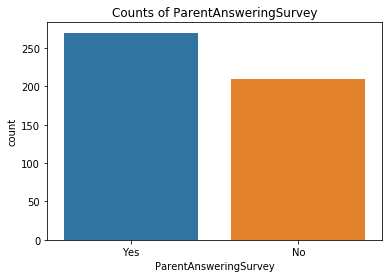

In [30]:
sns.countplot(x='ParentAnsweringSurvey' , data= data , order = data['ParentAnsweringSurvey'].value_counts().index)
plt.title('Counts of ParentAnsweringSurvey')
data.ParentAnsweringSurvey.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

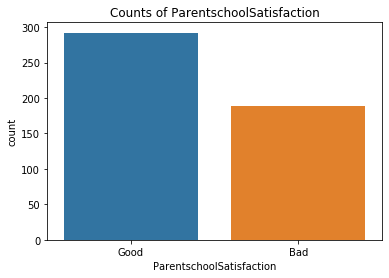

In [31]:
sns.countplot(x='ParentschoolSatisfaction' , data= data , order = data['ParentschoolSatisfaction'].value_counts().index)
plt.title('Counts of ParentschoolSatisfaction')
data.ParentschoolSatisfaction.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

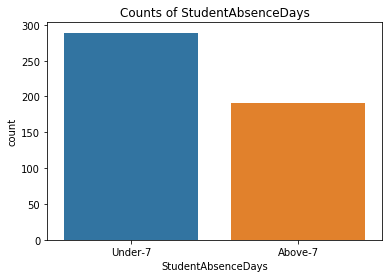

In [32]:
sns.countplot(x='StudentAbsenceDays' , data= data , order = data['StudentAbsenceDays'].value_counts().index)
plt.title('Counts of StudentAbsenceDays')
data.StudentAbsenceDays.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

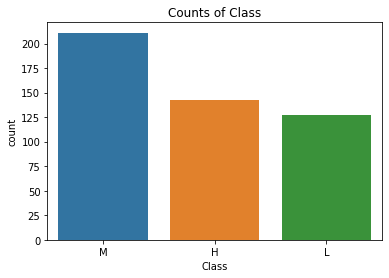

In [33]:
sns.countplot(x='Class' , data= data , order = data['Class'].value_counts().index)
plt.title('Counts of Class')
data.Class.value_counts()

In [34]:
new_data=data.copy()

# Q2) Look at some categorical features in relation to each other, to see what insights could be possibly read?


Text(0.5, 1.0, 'Pie Chart of Place of Birth')

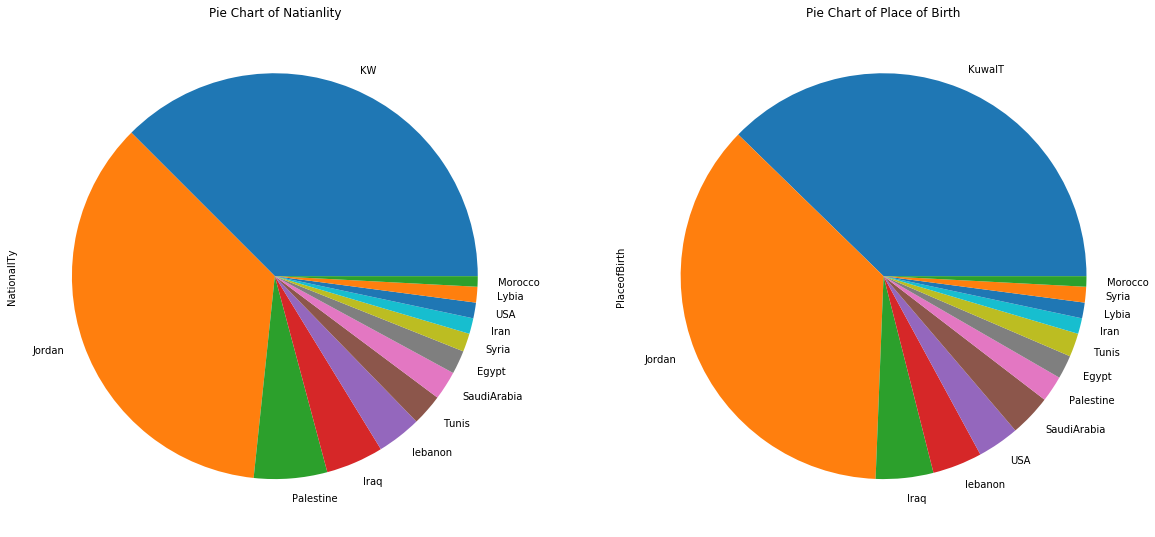

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
data['NationalITy'].value_counts().plot(kind='pie')
plt.title('Pie Chart of Natianlity')
plt.subplot(1,2,2)
data['PlaceofBirth'].value_counts().plot(kind='pie')
plt.title('Pie Chart of Place of Birth')
# here it looks similar , so we can say that if the student take a birth is a Kuwait then most of the times the nationality
#of the student is Kuwaity remove any one column before building the model.


In [36]:
data.groupby(['NationalITy' , 'PlaceofBirth']).size().reset_index(name='Count')
# Here we found that both columns have high similarity. so we can remove any one columns.


,NationalITy,PlaceofBirth,Count
0,Egypt,Egypt,8
1,Egypt,KuwaIT,1
2,Iran,Iran,6
3,Iraq,Iraq,22
4,Jordan,Egypt,1
5,Jordan,Jordan,152
6,Jordan,KuwaIT,1
7,Jordan,Palestine,4
8,Jordan,SaudiArabia,9
9,Jordan,USA,2


In [37]:
data.groupby(['gender' , 'NationalITy']).size().reset_index(name='Count')

,gender,NationalITy,Count
0,F,Egypt,2
1,F,Iran,1
2,F,Iraq,6
3,F,Jordan,79
4,F,KW,54
5,F,Lybia,2
6,F,Morocco,1
7,F,Palestine,8
8,F,SaudiArabia,4
9,F,Syria,2


In [38]:
data.groupby(['ParentAnsweringSurvey' , 'ParentschoolSatisfaction']).size().reset_index(name='Count')
#When school management take parent answering survey that time parent school satisfaction is high.

,ParentAnsweringSurvey,ParentschoolSatisfaction,Count
0,No,Bad,145
1,No,Good,65
2,Yes,Bad,43
3,Yes,Good,227


# Q.3 Visualize categorical variables with numerical variables 
 # and give conclusions?


In [39]:
grade = data.GradeID
visit = data.VisITedResources
view= data.AnnouncementsView
attend = data.StudentAbsenceDays
rhd=data.raisedhands
dis=data.Discussion


<BarContainer object of 480 artists>

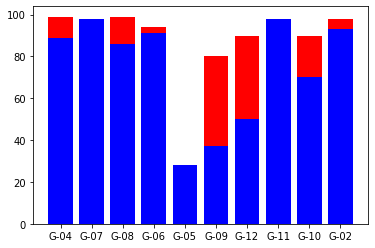

In [40]:
#Region - wise Sales and profit
plt.bar(grade,visit,label = 'VisITedResources',color = 'r')
plt.bar(grade,view,label = 'AnnouncementsView',color = 'b' )
#plt.bar(attend,rhd,label = 'raisedhands',color = 'yellow')

<BarContainer object of 480 artists>

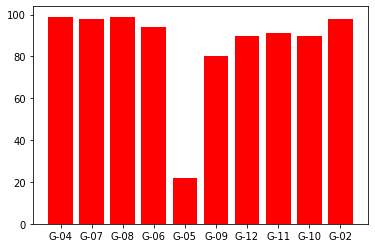

In [41]:
plt.bar(grade,visit,label = 'VisITedResources',color = 'r')

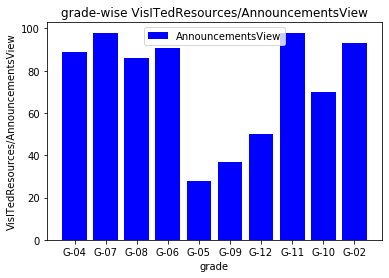

In [42]:
plt.bar(grade,view,label = 'AnnouncementsView',color = 'b' )
plt.xlabel('grade')
plt.ylabel('VisITedResources/AnnouncementsView')
plt.title('grade-wise VisITedResources/AnnouncementsView')
plt.legend()

<BarContainer object of 480 artists>

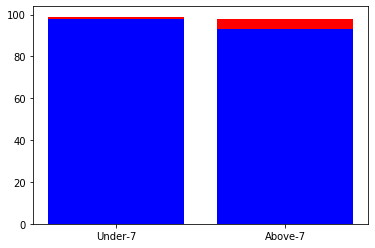

In [43]:
#Region - wise Sales and profit
plt.bar(attend,visit,label = 'VisITedResources',color = 'r')
plt.bar(attend,view,label = 'AnnouncementsView',color = 'b' )
#plt.bar(attend,rhd,label = 'raisedhands',color = 'yellow')

In [44]:
for f in fc:
    print("columns = ", f ,"\n",data[f].unique(),"\n")

columns =  gender 
 ['M' 'F'] 

columns =  NationalITy 
 ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Iran' 'Tunis'
 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia'] 

columns =  PlaceofBirth 
 ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'Iran' 'Tunis'
 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia'] 

columns =  StageID 
 ['lowerlevel' 'MiddleSchool' 'HighSchool'] 

columns =  GradeID 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02'] 

columns =  SectionID 
 ['A' 'B' 'C'] 

columns =  Topic 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology'] 

columns =  Semester 
 ['F' 'S'] 

columns =  Relation 
 ['Father' 'Mum'] 

columns =  ParentAnsweringSurvey 
 ['Yes' 'No'] 

columns =  ParentschoolSatisfaction 
 ['Good' 'Bad'] 

columns =  StudentAbsenceDays 
 ['Under-7' 'Above-7'] 

columns =  Class 
 ['M' 'L' 'H'] 



Text(0.5, 1.0, 'Boxplot for raisedhands')

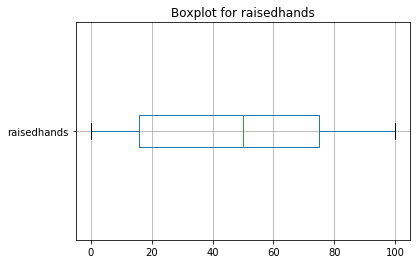

In [45]:
data.boxplot('raisedhands',vert=False)
plt.title('Boxplot for raisedhands')

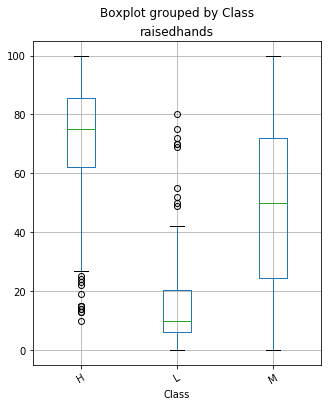

In [46]:
data.boxplot('raisedhands','Class',rot = 30,figsize=(5,6))

In [47]:
nc

array(['raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion'], dtype=object)

In [48]:
cols = data.columns
cols

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [49]:
#remove the original factor variables
cols =list(set(cols) -set(fc))
print(cols)

['Discussion', 'VisITedResources', 'AnnouncementsView', 'raisedhands']


In [50]:
num = data[nc]
num

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


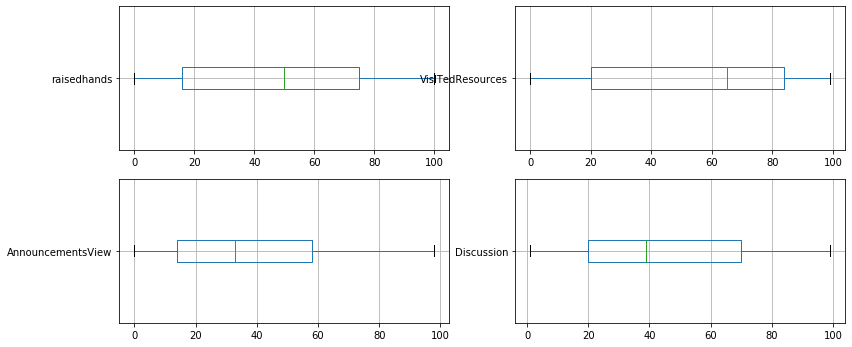

In [51]:
# Now check outlier in a loop
nrow = 3;ncol=2;npos=1
fig = plt.figure(figsize =(13,9))
for c in num:
    fig.add_subplot(nrow,ncol,npos)
    data.boxplot(c , vert=False)
    npos+=1


In [52]:
#convert factor to dummmies varraibles
#new_data=data.copy()

In [53]:
num = data[nc]
num

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


# 
3D Fig for numeric dataas it takes 3 col we have taken 3 int data

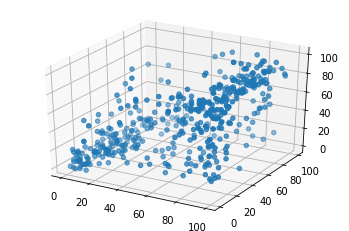

In [54]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(num['VisITedResources'], num['Discussion'], num['raisedhands'])

plt.show()

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 
Distribution graphs (histogram/bar graph) of column data

In [56]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

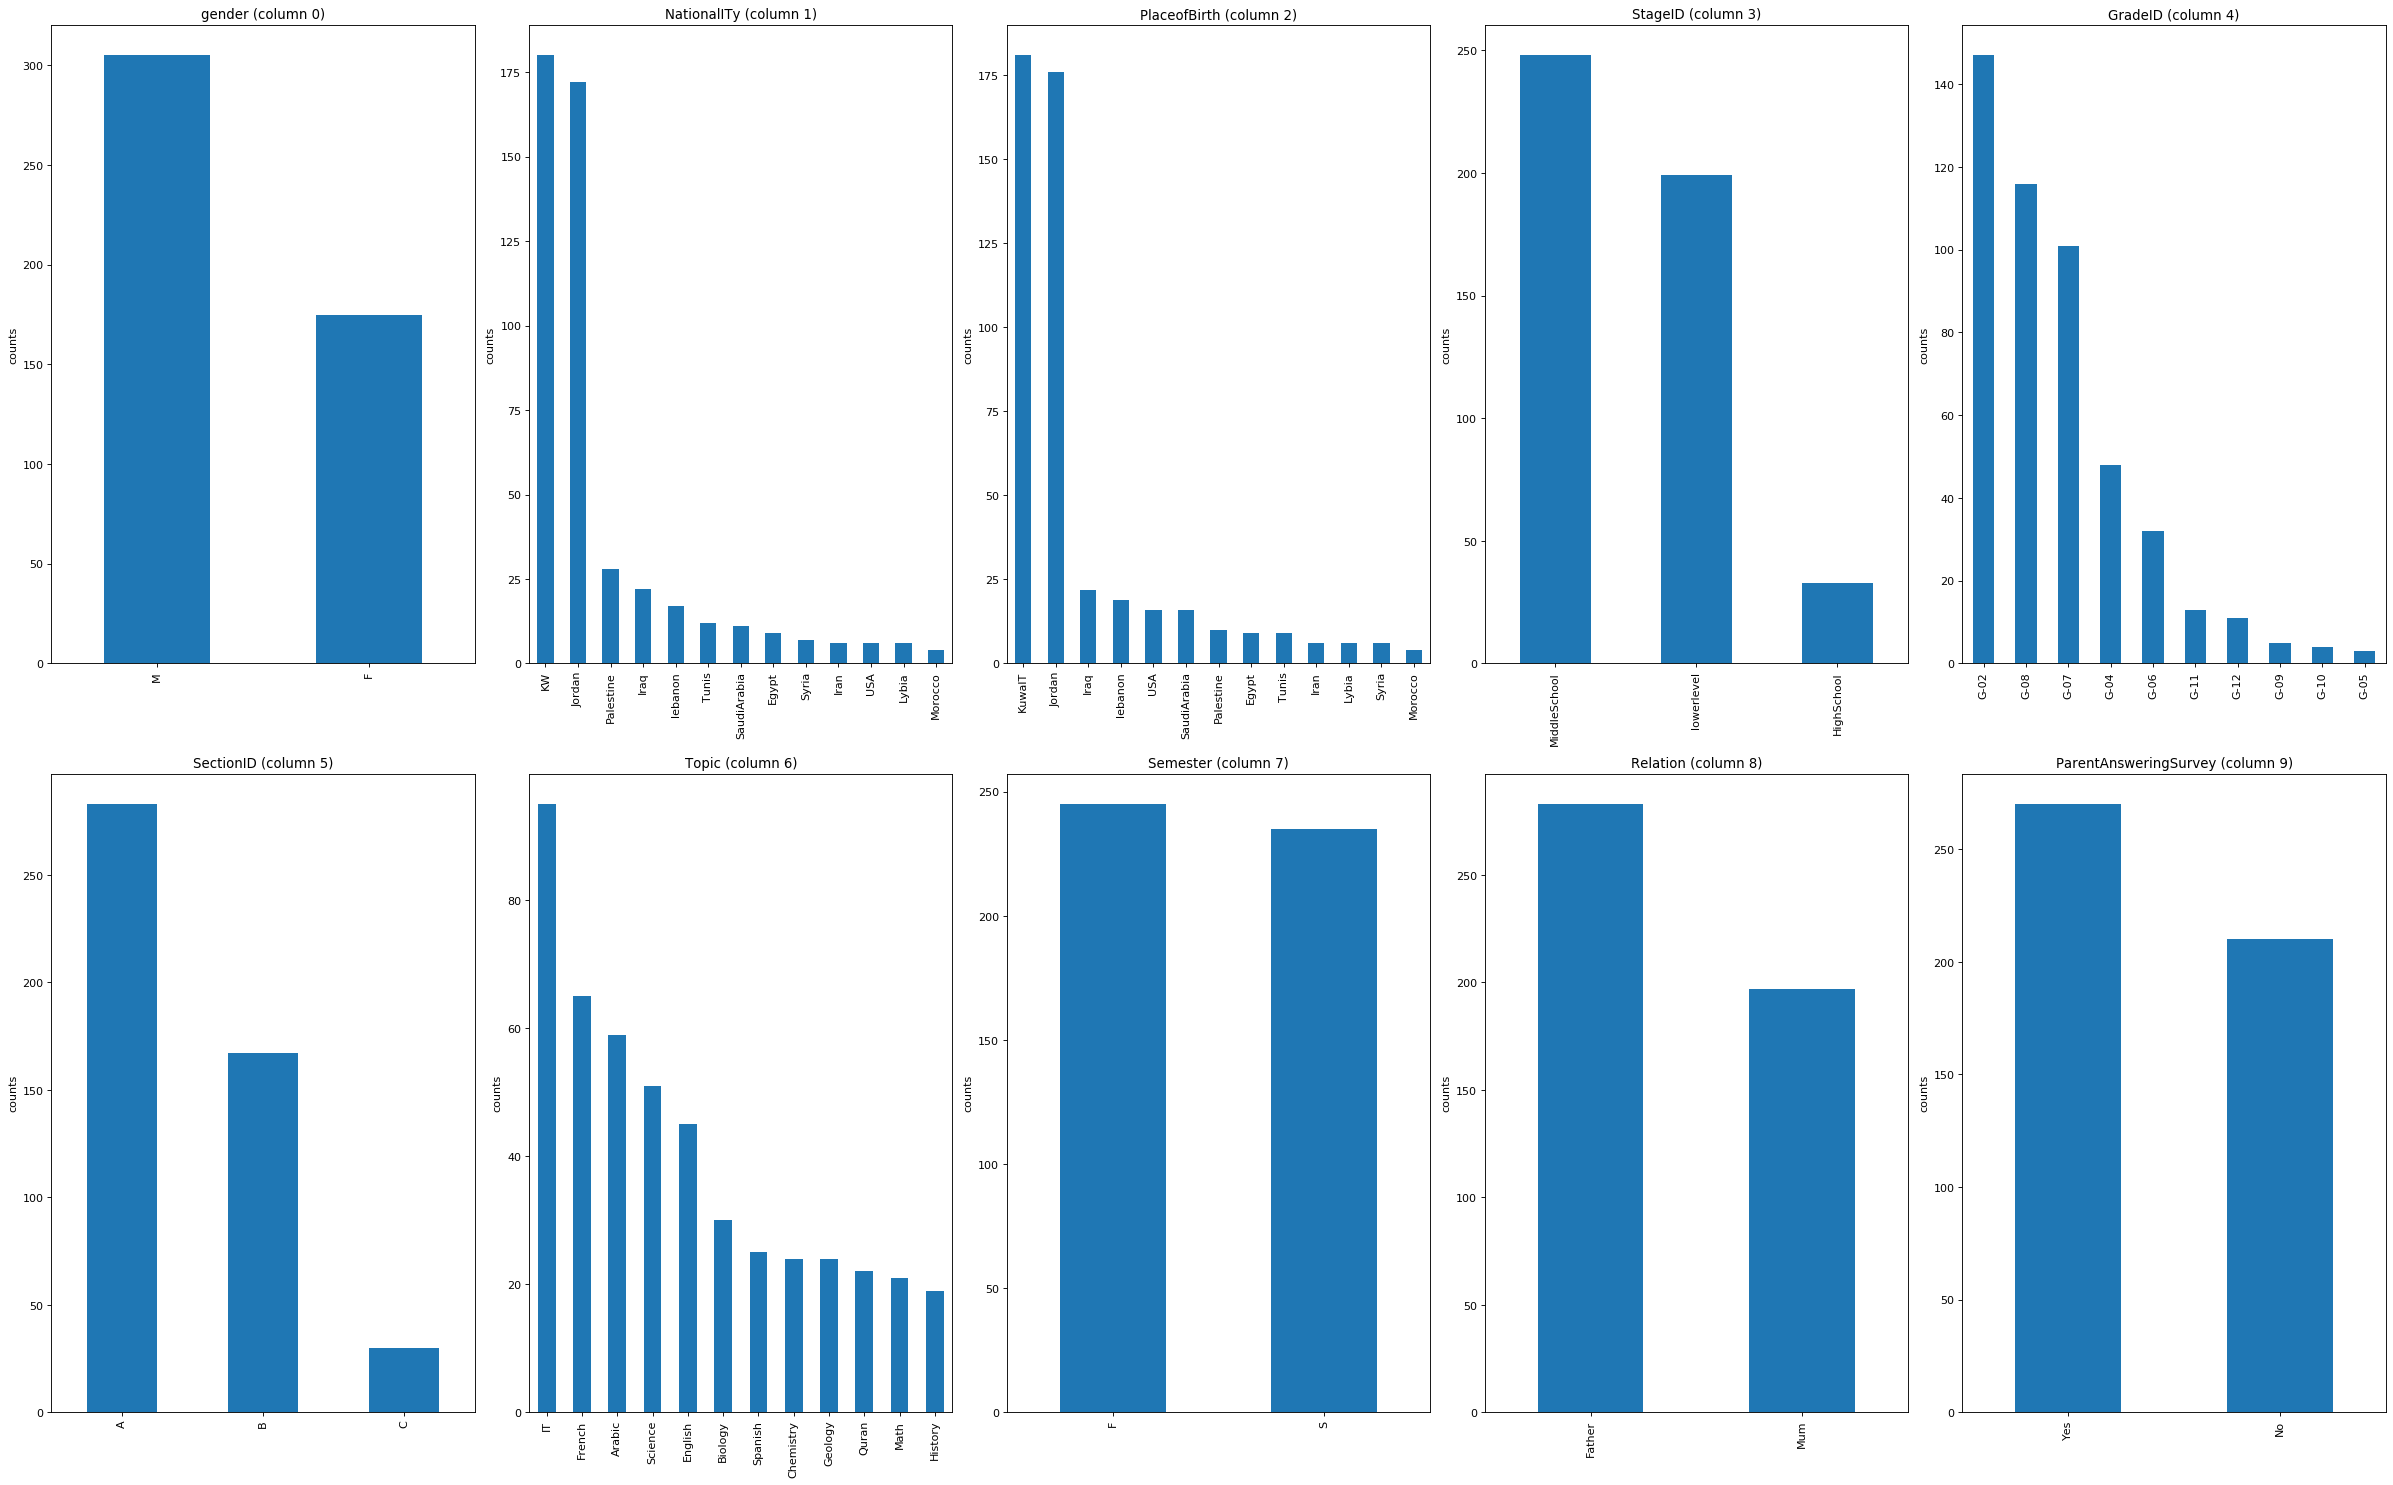

In [57]:
plotPerColumnDistribution(data, 10, 5)

# Visualize categorical variables with numerical variables and give conclusions?


# 
Scatter and density plots

In [58]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

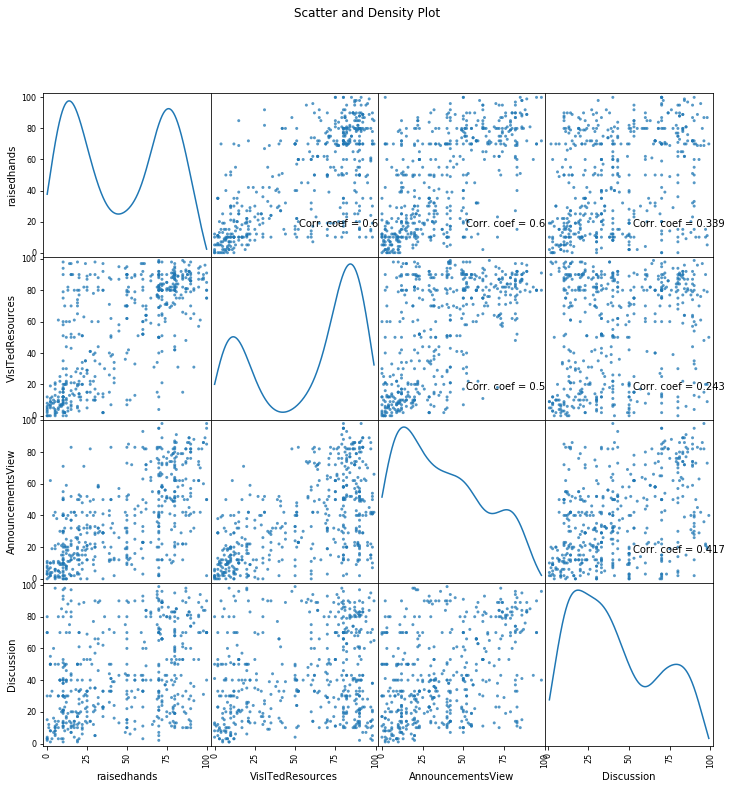

In [59]:
plotScatterMatrix(data, 12, 10)

<BarContainer object of 480 artists>

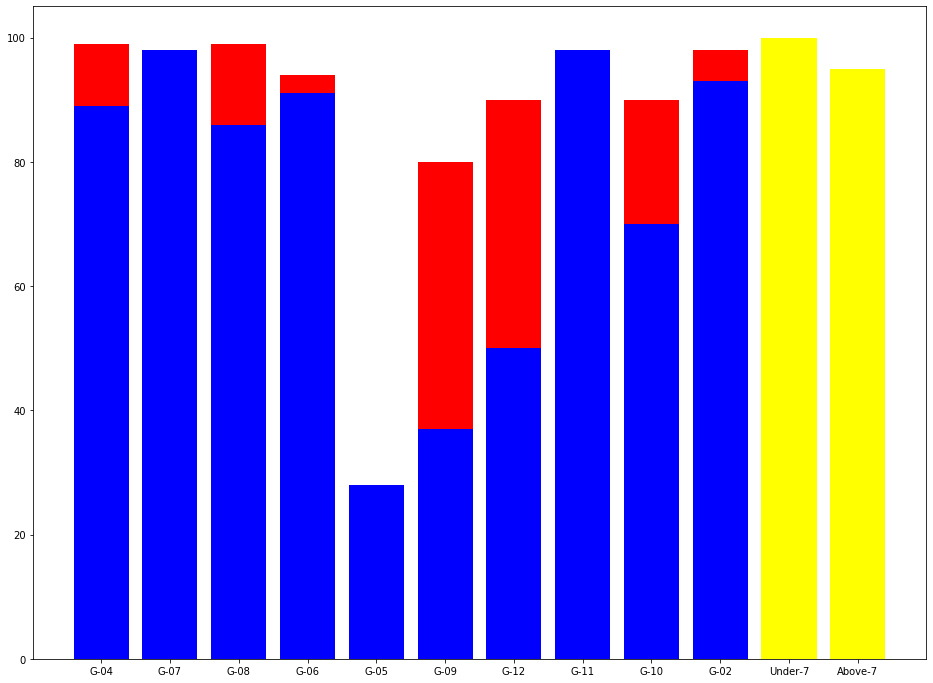

In [60]:
#stack bar chart between numerical variable and categorical variable.
plt.figure(figsize=(16,12))
plt.bar(grade,visit,label = 'VisITedResources',color = 'r')
plt.bar(grade,view,label = 'AnnouncementsView',color = 'b' )
plt.bar(attend,rhd,label = 'raisedhands',color = 'yellow')


In [61]:
slices = round(data.groupby('GradeID')['AnnouncementsView'].sum()/sum(data['AnnouncementsView'])*100,2)
slices
# Form the class and sort
mode = data['GradeID'].unique()
mode.sort()


Text(0.5, 1.0, 'Pie Chart of GradeID with AnnouncementsView')

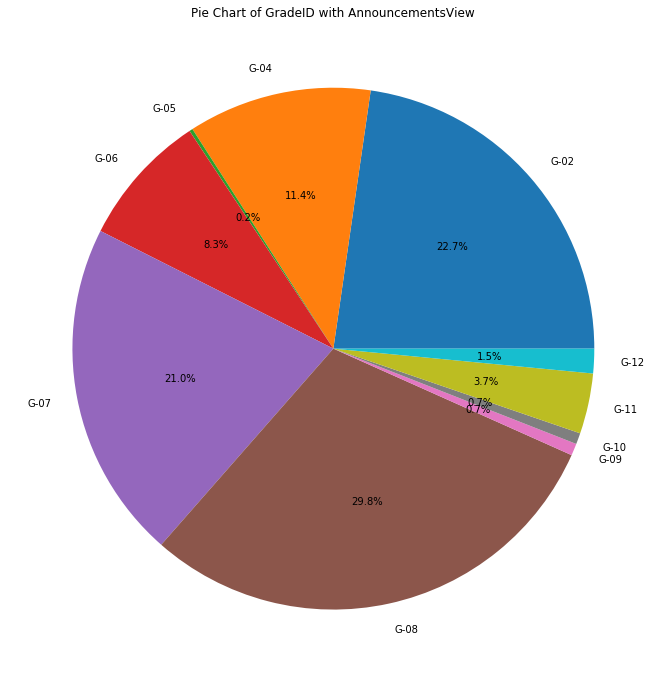

In [62]:
plt.figure(figsize=(14,12))
plt.pie(slices ,labels=mode , autopct='%1.1f%%')
plt.title('Pie Chart of GradeID with AnnouncementsView')

In [63]:
slices1 = round(data.groupby('GradeID')['raisedhands'].sum()/sum(data['raisedhands'])*100,2)
slices
# Form the class and sort
mode1 = data['GradeID'].unique()
mode1.sort()
mode1


array(['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10',
       'G-11', 'G-12'], dtype=object)

Text(0.5, 1.0, 'Pie Chart of GradeID with Raisedhands')

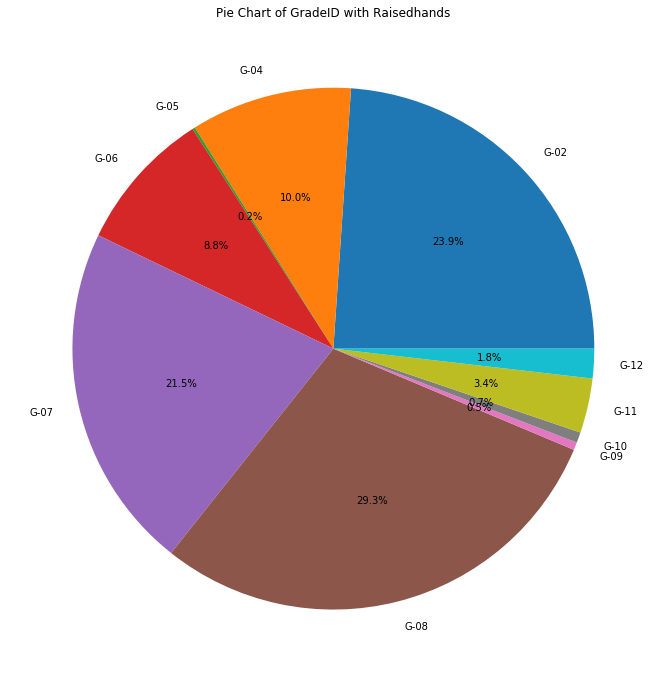

In [64]:
plt.figure(figsize=(14,12))
plt.pie(slices1 ,labels=mode1 , autopct='%1.1f%%')
plt.title('Pie Chart of GradeID with Raisedhands')


In [65]:
dd = data.groupby(['Class' ,'StudentAbsenceDays']).size().reset_index(name='Counts')
dd
   

,Class,StudentAbsenceDays,Counts
0,H,Above-7,4
1,H,Under-7,138
2,L,Above-7,116
3,L,Under-7,11
4,M,Above-7,71
5,M,Under-7,140


In [66]:
dd[dd.StudentAbsenceDays=='Under-7'].sum().reset_index()

,index,0
0,Class,HLM
1,StudentAbsenceDays,Under-7Under-7Under-7
2,Counts,289


In [67]:
dd[dd.StudentAbsenceDays=='Above-7'].sum().reset_index()


,index,0
0,Class,HLM
1,StudentAbsenceDays,Above-7Above-7Above-7
2,Counts,191


In [68]:
data.groupby(['Semester','Topic', 'GradeID']).size().reset_index(name='Count')
#here we can analyse that how many student are from semester first and how get grade. and all this things.


,Semester,Topic,GradeID,Count
0,F,Arabic,G-02,15
1,F,Arabic,G-08,3
2,F,Biology,G-07,15
3,F,Chemistry,G-08,12
4,F,English,G-05,3
5,F,English,G-06,13
6,F,English,G-07,2
7,F,English,G-12,10
8,F,French,G-02,22
9,F,Geology,G-08,12


In [69]:
data.groupby(['ParentAnsweringSurvey','ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']).size().reset_index(name='Count')


,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Count
0,No,Bad,Above-7,H,1
1,No,Bad,Above-7,L,72
2,No,Bad,Above-7,M,13
3,No,Bad,Under-7,H,8
4,No,Bad,Under-7,L,7
5,No,Bad,Under-7,M,44
6,No,Good,Above-7,L,20
7,No,Good,Above-7,M,8
8,No,Good,Under-7,H,19
9,No,Good,Under-7,M,18


In [70]:
data.groupby(['gender','StageID', 'GradeID' , 'SectionID']).size().reset_index(name='Count')

,gender,StageID,GradeID,SectionID,Count
0,F,HighSchool,G-09,A,2
1,F,HighSchool,G-11,A,3
2,F,HighSchool,G-11,B,2
3,F,HighSchool,G-12,A,8
4,F,MiddleSchool,G-06,A,15
5,F,MiddleSchool,G-07,A,19
6,F,MiddleSchool,G-07,B,12
7,F,MiddleSchool,G-08,A,33
8,F,MiddleSchool,G-08,B,2
9,F,MiddleSchool,G-08,C,1


In [71]:
data.groupby(['gender','Topic', 'Semester' , 'Relation']).size().reset_index(name='Count')


,gender,Topic,Semester,Relation,Count
0,F,Arabic,F,Father,4
1,F,Arabic,F,Mum,2
2,F,Arabic,S,Father,6
3,F,Arabic,S,Mum,4
4,F,Biology,F,Mum,5
...,...,...,...,...,...
77,M,Science,F,Mum,3
78,M,Science,S,Father,13
79,M,Science,S,Mum,6
80,M,Spanish,S,Father,14


# From the above result, what are the factors that leads to get low grades of the students?

In [72]:
print(data.loc[data['GradeID']=='G-12'])


   gender NationalITy PlaceofBirth     StageID GradeID SectionID    Topic  \
47      F          KW       KuwaIT  HighSchool    G-12         A  English   
48      F          KW       KuwaIT  HighSchool    G-12         A  English   
49      F          KW       KuwaIT  HighSchool    G-12         A  English   
50      F          KW       KuwaIT  HighSchool    G-12         A  English   
51      M          KW       KuwaIT  HighSchool    G-12         A  English   
52      F          KW       KuwaIT  HighSchool    G-12         A  English   
54      M          KW       KuwaIT  HighSchool    G-12         A  English   
65      M          KW       KuwaIT  HighSchool    G-12         A  English   
66      F          KW       KuwaIT  HighSchool    G-12         A  English   
67      F         USA          USA  HighSchool    G-12         A  English   
68      F         USA          USA  HighSchool    G-12         A       IT   

   Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
4

# this are the factor which reduce the student grade. and due this reasons student get G-12 Grade.


# 
Checking for Multicolinearity.

Text(0.5, 1, 'HeatMap Correlation Matrix')

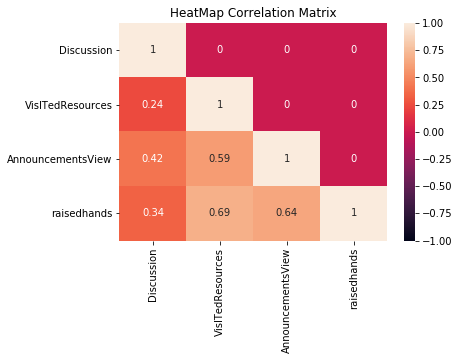

In [73]:
# we have to check the multicolinearity in data.
# Checking for Multicolinearity.
# Correlation Matrix take only the lower triangle 
cor = data[cols].corr()
cor = np.tril(cor)
sns.heatmap(cor , xticklabels = cols , yticklabels = cols ,
 vmin = -1 , vmax = 1 , annot=True , square = False)
plt.title('HeatMap Correlation Matrix') 


In [74]:
cols

['Discussion', 'VisITedResources', 'AnnouncementsView', 'raisedhands']

In [75]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [76]:
new_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [77]:
# lets drop a column of Place of Birth coz we observed that there is high similarity between Nationality and Place of Birth.
new_data = new_data.drop('PlaceofBirth' , axis=1)


In [78]:
new_data = new_data.sample(frac=1)

In [79]:
new_data

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
114,M,KW,lowerlevel,G-02,B,IT,F,Father,11,2,0,50,No,Bad,Above-7,L
128,M,KW,lowerlevel,G-02,C,IT,F,Father,12,10,20,16,No,Bad,Under-7,L
249,M,KW,lowerlevel,G-04,A,IT,S,Father,65,86,62,40,No,Good,Above-7,M
172,M,Iran,lowerlevel,G-02,B,French,S,Mum,20,22,53,13,No,Good,Above-7,L
347,F,Jordan,lowerlevel,G-02,B,French,S,Mum,23,82,20,30,No,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,F,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,85,99,42,90,Yes,Good,Under-7,H
83,M,KW,lowerlevel,G-02,B,IT,F,Father,7,4,10,50,No,Good,Above-7,M
388,M,Jordan,lowerlevel,G-02,B,Arabic,F,Mum,4,10,11,7,No,Good,Above-7,L
431,M,Jordan,MiddleSchool,G-08,A,Geology,S,Father,80,89,23,68,No,Bad,Under-7,H


# As there is no mentioned in the dataset we have taken "StudentAbsenceDays" as our Y-variable and as because it is binary class

In [80]:
fc

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'], dtype=object)

In [81]:
dfc =np.array(['gender', 'NationalITy','StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'Class'])
dfc

array(['gender', 'NationalITy', 'StageID', 'GradeID', 'SectionID',
       'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'Class'], dtype='<U24')

# we have created dummy variables for categorical (object) variables except "StudentAbsenceDays"

In [82]:
for f in dfc:
    dummy=pd.get_dummies(data[f],drop_first=True,prefix=f)
    new_data= new_data.join(dummy)
    

# 
we haved joined the dummy variables to new_data

In [83]:
new_data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,Class_L,Class_M
114,M,KW,lowerlevel,G-02,B,IT,F,Father,11,2,...,0,0,0,0,0,0,0,0,1,0
128,M,KW,lowerlevel,G-02,C,IT,F,Father,12,10,...,0,0,0,0,0,0,0,0,1,0
249,M,KW,lowerlevel,G-04,A,IT,S,Father,65,86,...,0,0,0,0,1,0,0,1,0,1
172,M,Iran,lowerlevel,G-02,B,French,S,Mum,20,22,...,0,0,0,0,1,1,0,1,1,0
347,F,Jordan,lowerlevel,G-02,B,French,S,Mum,23,82,...,0,0,0,0,1,1,0,1,0,0


In [84]:
new_data.StudentAbsenceDays

114    Above-7
128    Under-7
249    Above-7
172    Above-7
347    Under-7
        ...   
464    Under-7
83     Above-7
388    Above-7
431    Under-7
304    Under-7
Name: StudentAbsenceDays, Length: 480, dtype: object

In [85]:
new_data.StudentAbsenceDays.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

# we have done label encoding for Y-variable

In [86]:
new_data.StudentAbsenceDays.replace({'Under-7':0,'Above-7':1},inplace=True)

In [87]:
new_data.StudentAbsenceDays.value_counts()

0    289
1    191
Name: StudentAbsenceDays, dtype: int64

In [88]:
new_data.StudentAbsenceDays

114    1
128    0
249    1
172    1
347    0
      ..
464    0
83     1
388    1
431    0
304    0
Name: StudentAbsenceDays, Length: 480, dtype: int64

In [89]:
new_data.dtypes

gender                           object
NationalITy                      object
StageID                          object
GradeID                          object
SectionID                        object
Topic                            object
Semester                         object
Relation                         object
raisedhands                       int64
VisITedResources                  int64
AnnouncementsView                 int64
Discussion                        int64
ParentAnsweringSurvey            object
ParentschoolSatisfaction         object
StudentAbsenceDays                int64
Class                            object
gender_M                          uint8
NationalITy_Iran                  uint8
NationalITy_Iraq                  uint8
NationalITy_Jordan                uint8
NationalITy_KW                    uint8
NationalITy_Lybia                 uint8
NationalITy_Morocco               uint8
NationalITy_Palestine             uint8
NationalITy_SaudiArabia           uint8


# we are dopping the originals as we have added dummy variables in dataset

In [90]:
new_data = new_data.drop(['gender', 'NationalITy', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'Class'],axis=1)

In [91]:
new_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,Class_L,Class_M
114,11,2,0,50,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
128,12,10,20,16,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
249,65,86,62,40,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
172,20,22,53,13,1,1,1,0,0,0,...,0,0,0,0,1,1,0,1,1,0
347,23,82,20,30,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,85,99,42,90,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
83,7,4,10,50,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
388,4,10,11,7,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
431,80,89,23,68,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
new_data.StudentAbsenceDays.head(2)

114    1
128    0
Name: StudentAbsenceDays, dtype: int64

# Q.5 Build classification model and present it's classification 
# report?


In [93]:
#splirt the data into train and test
trainx,testx,trainy,testy = train_test_split(new_data.drop('StudentAbsenceDays',axis=1),new_data['StudentAbsenceDays'],test_size=0.3)

In [94]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(336, 47),trainy=(336,),testx=(144, 47),testy =(144,)


In [95]:
#build the logistic regression model using Logit()
m1=sm.Logit(trainy,trainx).fit()

         Current function value: 0.317799
         Iterations: 35


C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
#summary
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     StudentAbsenceDays   No. Observations:                  336
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           46
Date:                Tue, 30 Mar 2021   Pseudo R-squ.:                  0.5334
Time:                        22:57:52   Log-Likelihood:                -106.78
converged:                      False   LL-Null:                       -228.86
Covariance Type:            nonrobust   LLR p-value:                 8.380e-29
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
raisedhands                      -0.0097      0.011     -0.870      0.384      -0.031       0.012
VisITedResources                 -0.0063      0.010     -0.655      0.513      -0.025       0.013
AnnouncementsView                 0.0322      0.013      2.511      0.012       0.007       0.057
Discussion                       -0.0037      0.008     -0.441      0.659      -0.020       0.013
gender_M                          0.2346      0.425      0.552      0.581      -0.599       1.068
NationalITy_Iran                  0.1389      2.241      0.062      0.951      -4.253       4.531
NationalITy_Iraq                 -0.5883      1.901     -0.309      0.757      -4.314       3.137
NationalITy_Jordan               -1.3578      1.631     -0.833      0.405      -4.554       1.838
NationalITy_KW                   -3.1481      1.727     -1.823      0.068      -6.532       0.236
NationalITy_Lybia                19.2467   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
NationalITy_Morocco              -3.5697      2.435     -1.466      0.143      -8.342       1.202
NationalITy_Palestine            -4.0556      1.924     -2.108      0.035      -7.827      -0.284
NationalITy_SaudiArabia           0.1942      2.081      0.093      0.926      -3.884       4.273
NationalITy_Syria                -0.5440      2.115     -0.257      0.797      -4.690       3.602
NationalITy_Tunis                -2.7931      2.053     -1.361      0.174      -6.816       1.230
NationalITy_USA                 -24.0918   7.13e+04     -0.000      1.000    -1.4e+05     1.4e+05
NationalITy_lebanon              -3.3422      2.300     -1.453      0.146      -7.849       1.165
StageID_MiddleSchool            -21.8337    3.5e+04     -0.001      1.000   -6.87e+04    6.86e+04
StageID_lowerlevel               -3.3705      2.126     -1.586      0.113      -7.537       0.796
GradeID_G-04                      0.7920      0.977      0.811      0.417      -1.122       2.706
GradeID_G-05                     17.1689   2.21e+04      0.001      0.999   -4.34e+04    4.34e+04
GradeID_G-06                     16.9578    3.5e+04      0.000      1.000   -6.87e+04    6.87e+04
GradeID_G-07                     17.8044    3.5e+04      0.001      1.000   -6.86e+04    6.87e+04
GradeID_G-08                     17.4447    3.5e+04      0.000      1.000   -6.86e+04    6.87e+04
GradeID_G-09                     -5.2584      2.814     -1.868      0.062     -10.774       0.258
GradeID_G-10                     -5.4755      2.604     -2.103      0.036     -10.580      -0.371
GradeID_G-11                     -1.4922      2.557     -0.584      0.559      -6.504       3.519
GradeID_G-12                     -3.0815      3.066     -1.005      0.315      -9.090       2.927
SectionID_B                      -0.4252      0.582     -0.731      0.465      -1.566       0.715
SectionID_C                      -1.6177      1.024     -1.580      0.114      -3.624       0.389
Topic_B

In [97]:
p1 = m1.predict(testx)
p1

266    0.492658
369    0.000741
262    0.729481
318    0.001204
326    0.841294
         ...   
220    0.025317
185    0.005916
293    0.017242
457    0.023590
323    0.923526
Length: 144, dtype: float64

In [98]:
#converting probabilities into classes 
p1_Y = p1.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

In [99]:
#confusion matrix
confusion_matrix(testy,p1_Y)

array([[75, 20],
       [10, 39]], dtype=int64)

In [100]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})
df

,actual,predicted
266,1,0.0
369,0,0.0
262,1,1.0
318,0,0.0
326,1,1.0
...,...,...
220,0,0.0
185,0,0.0
293,0,0.0
457,0,0.0


In [101]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,75,20,95
1,10,39,49
All,85,59,144


In [102]:
#classification_report
print(classification_report(testy,p1_Y))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        95
           1       0.66      0.80      0.72        49

    accuracy                           0.79       144
   macro avg       0.77      0.79      0.78       144
weighted avg       0.81      0.79      0.80       144



In [103]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.7916666666666666


In [104]:
#AUC/ROC
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_Y)

In [105]:
#auc score
auc_score = metrics.auc(fpr,tpr)
print("AUC for model =",auc_score)

AUC for model = 0.7926960257787325


Text(0, 0.5, 'TPR')

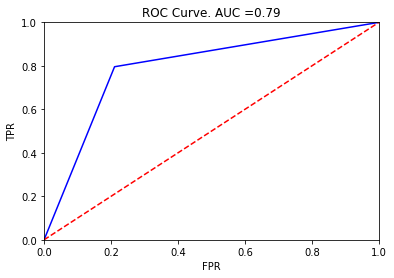

In [106]:
#plot for ROC 
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC ='+str(round(auc_score,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')

In [107]:
#feature selection
features = trainx.columns
score,pval = f_classif(trainx,trainy)

In [108]:
df_scores = pd.DataFrame({'feature':features,'score':score,'pvalue':pval})

In [109]:
#sort the dataset in the descending order of scores
df_scores.sort_values('score',ascending=False,inplace=True)
print(df_scores)

                          feature       score        pvalue
45                        Class_L  189.741200  1.702698e-34
1                VisITedResources   90.652135  3.585314e-19
0                     raisedhands   79.602467  3.080238e-17
2               AnnouncementsView   28.848953  1.469330e-07
42                   Relation_Mum   18.949433  1.786875e-05
44  ParentschoolSatisfaction_Good   16.655194  5.612754e-05
43      ParentAnsweringSurvey_Yes   16.162244  7.191229e-05
4                        gender_M   12.193698  5.439790e-04
3                      Discussion   11.929370  6.237294e-04
9               NationalITy_Lybia    7.038147  8.360318e-03
11          NationalITy_Palestine    6.925093  8.893736e-03
17           StageID_MiddleSchool    6.275109  1.272027e-02
18             StageID_lowerlevel    6.108874  1.394859e-02
19                   GradeID_G-04    6.007484  1.475739e-02
46                        Class_M    4.229642  4.050024e-02
33                   Topic_French    3.8

In [110]:
#VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['inflation']=[variance_inflation_factor(trainx.values,i)
for i in range (trainx.shape[1])]

vif['features'] =list(trainx.columns)

vif
  
    
    #consider  VIF> 10 to remove coolinearity
    #sometimes VIF > 6 is also taken as the cutoff

,inflation,features
0,3.359477,raisedhands
1,3.156981,VisITedResources
2,2.696122,AnnouncementsView
3,1.510902,Discussion
4,1.316275,gender_M
5,1.850528,NationalITy_Iran
6,4.082771,NationalITy_Iraq
7,15.563366,NationalITy_Jordan
8,16.763973,NationalITy_KW
9,2.166079,NationalITy_Lybia


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [112]:
X = new_data.iloc[:,:-1]
calc_vif(X)
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


,variables,VIF
0,raisedhands,2.981612
1,VisITedResources,3.144493
2,AnnouncementsView,2.618027
3,Discussion,1.553833
4,StudentAbsenceDays,1.938765
5,gender_M,1.286188
6,NationalITy_Iran,1.801755
7,NationalITy_Iraq,3.778389
8,NationalITy_Jordan,14.453580
9,NationalITy_KW,14.603701


In [ ]:
#1)understanding the problem statement
#2) do the data minning 
#3)data preparation/ data cleaning
#4)do the sampling
#5)build the model(train the model)
#6)Test the model on the test data
#7) check the model for the business sutability


In [113]:
new_data

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,Class_L,Class_M
114,11,2,0,50,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
128,12,10,20,16,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
249,65,86,62,40,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
172,20,22,53,13,1,1,1,0,0,0,...,0,0,0,0,1,1,0,1,1,0
347,23,82,20,30,0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,85,99,42,90,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
83,7,4,10,50,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
388,4,10,11,7,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
431,80,89,23,68,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [114]:
vif_col = np.array(['NationalITy_Jordan','NationalITy_KW','StageID_MiddleSchool','StageID_lowerlevel','GradeID_G-06','GradeID_G-07','GradeID_G-08','Topic_English'])
vif_col

array(['NationalITy_Jordan', 'NationalITy_KW', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-06', 'GradeID_G-07',
       'GradeID_G-08', 'Topic_English'], dtype='<U20')

In [115]:
new_vif = new_data[vif_col]
new_vif

,NationalITy_Jordan,NationalITy_KW,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-06,GradeID_G-07,GradeID_G-08,Topic_English
114,0,1,0,1,0,0,0,0
128,0,1,0,1,0,0,0,0
249,0,1,0,1,0,0,0,0
172,0,0,0,1,0,0,0,0
347,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
464,1,0,1,0,0,0,1,0
83,0,1,0,1,0,0,0,0
388,1,0,0,1,0,0,0,0
431,1,0,1,0,0,0,1,0


In [116]:
new_vif['StudentAbsenceDays'] = new_data.StudentAbsenceDays

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
new_vif

,NationalITy_Jordan,NationalITy_KW,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-06,GradeID_G-07,GradeID_G-08,Topic_English,StudentAbsenceDays
114,0,1,0,1,0,0,0,0,1
128,0,1,0,1,0,0,0,0,0
249,0,1,0,1,0,0,0,0,1
172,0,0,0,1,0,0,0,0,1
347,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
464,1,0,1,0,0,0,1,0,0
83,0,1,0,1,0,0,0,0,1
388,1,0,0,1,0,0,0,0,1
431,1,0,1,0,0,0,1,0,0


# model 2 : based on VIF

In [118]:
new_vif.StudentAbsenceDays

114    1
128    0
249    1
172    1
347    0
      ..
464    0
83     1
388    1
431    0
304    0
Name: StudentAbsenceDays, Length: 480, dtype: int64

In [123]:
#splirt the data into train and test
trainx,testx,trainy,testy = train_test_split(new_vif.drop('StudentAbsenceDays',axis=1),new_vif['StudentAbsenceDays'],test_size=0.3)

In [124]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(336, 8),trainy=(336,),testx=(144, 8),testy =(144,)


In [125]:
#build the logistic regression model using Logit()
m1=sm.Logit(trainy,trainx).fit()

         Current function value: 0.652367
         Iterations: 35


C:\Users\mayur\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [126]:
#summary
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     StudentAbsenceDays   No. Observations:                  336
Model:                          Logit   Df Residuals:                      328
Method:                           MLE   Df Model:                            7
Date:                Tue, 30 Mar 2021   Pseudo R-squ.:                 0.01830
Time:                        22:59:39   Log-Likelihood:                -219.20
converged:                      False   LL-Null:                       -223.28
Covariance Type:            nonrobust   LLR p-value:                    0.3177
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
NationalITy_Jordan       0.1454      0.292      0.497      0.619      -0.428       0.718
NationalITy_KW           0.4027      0.271      1.485      0.138      -0.129       0.934
StageID_MiddleSchool   -21.9547    3.5e+04     -0.001      1.000   -6.87e+04    6.86e+04
StageID_lowerlevel      -0.3727      0.247     -1.509      0.131      -0.857       0.112
GradeID_G-06            20.6072    3.5e+04      0.001      1.000   -6.87e+04    6.87e+04
GradeID_G-07            20.8984    3.5e+04      0.001      1.000   -6.87e+04    6.87e+04
GradeID_G-08            21.1089    3.5e+04      0.001      1.000   -6.87e+04    6.87e+04
Topic_English            0.4468      0.541      0.826      0.409      -0.613       1.507
========================================================================================
"""

In [127]:
p1 = m1.predict(testx)
p1

198    0.300309
148    0.286806
360    0.443400
255    0.507488
429    0.331712
         ...   
352    0.443400
15     0.279942
41     0.342175
208    0.300309
325    0.407877
Length: 144, dtype: float64

In [128]:
#confusion matrix
confusion_matrix(testy,p1_Y)

array([[55, 26],
       [30, 33]], dtype=int64)

In [129]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})
df

,actual,predicted
0,0.0,NaN
1,0.0,NaN
2,NaN,1.0
4,1.0,NaN
9,0.0,0.0
...,...,...
469,1.0,NaN
473,NaN,0.0
477,NaN,0.0
478,1.0,1.0


In [130]:
#'actual'
testy

198    1
148    0
360    1
255    0
429    1
      ..
352    0
15     0
41     0
208    0
325    0
Name: StudentAbsenceDays, Length: 144, dtype: int64

In [131]:
#'predicted'
p1_Y

266    0.0
369    0.0
262    1.0
318    0.0
326    1.0
      ... 
220    0.0
185    0.0
293    0.0
457    0.0
323    1.0
Length: 144, dtype: float64

In [132]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0.0,27,3,30
1.0,5,14,19
All,32,17,49


In [133]:
#classification_report
print(classification_report(testy,p1_Y))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66        81
           1       0.56      0.52      0.54        63

    accuracy                           0.61       144
   macro avg       0.60      0.60      0.60       144
weighted avg       0.61      0.61      0.61       144



In [134]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.6111111111111112


In [135]:
#AUC/ROC
from sklearn import metrics
fpr,tpr,threshold = metrics.roc_curve(testy,p1_Y)

In [136]:
#auc score
auc_score = metrics.auc(fpr,tpr)
print("AUC for model =",auc_score)

AUC for model = 0.6014109347442681


Text(0, 0.5, 'TPR')

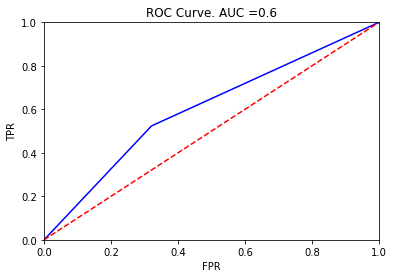

In [137]:
#plot for ROC 
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC Curve. AUC ='+str(round(auc_score,2)))
plt.xlabel('FPR')
plt.ylabel('TPR')

In [138]:
#feature selection
features = trainx.columns
score,pval = f_classif(trainx,trainy)

In [139]:
df_scores = pd.DataFrame({'feature':features,'score':score,'pvalue':pval})

In [140]:
#sort the dataset in the descending order of scores
df_scores.sort_values('score',ascending=False,inplace=True)
print(df_scores)

                feature     score    pvalue
3    StageID_lowerlevel  7.227754  0.007538
1        NationalITy_KW  5.214231  0.023030
2  StageID_MiddleSchool  4.708596  0.030717
5          GradeID_G-07  1.369684  0.242701
6          GradeID_G-08  0.669647  0.413758
4          GradeID_G-06  0.611843  0.434649
7         Topic_English  0.381412  0.537269
0    NationalITy_Jordan  0.039712  0.842166


# we conclude over here as model1 is showing  more accuracy than model2
# and f1-score ,recall,precision  of model1 is more compared to model2 